In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

df = pd.read_csv("house_data.csv")
df.info()
pd.set_option('display.max_columns',None)
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# 1. Initialisation d'un estimateur

In [112]:
from sklearn.model_selection import train_test_split

# définir y la cible et X les variables explicatives
y = df["price"]
X = df.drop("price", axis=1)
# X = df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat", "long","sqft_living15","sqft_lot15"]]

# définir la taille de la date à entrainer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [194]:
# importer le modèle
from sklearn.neighbors import KNeighborsRegressor

# initialiser en définissant ses hyperparamètres
model = KNeighborsRegressor(n_neighbors=5)

 # Entrainer le modèle
trained_model = model.fit(X_train,y_train)

# Evaluer le modèle
trained_model.score(X_test,y_test)



0.5289249640155353

In [195]:
# prédire avec la méthode
predict = trained_model.predict(X_test.head(1))
real = y.head(1).values

print(f"la valeur prédite est {predict}, alors que la valeur réelle est {real}")

la valeur prédite est [291160.], alors que la valeur réelle est [221900.]


# 2. La classe transformeur

In [196]:
# initialisation
from sklearn.model_selection import train_test_split

y = df["price"]
X = df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat", "long","sqft_living15","sqft_lot15"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=49)

# pre-processing de X_train
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()  # effectue une normalisation de MinMax sur l'ensemble de formation
X_train_min_max = minmax.fit_transform(X_train) # transforme X_train. le x de dataframe sort en np car plus leger que dataframe

# Entrainement sur X_train
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5) # création de modèle avec 5 voisins
trained_model = model.fit(X_train_min_max,y_train) # entraine le modèle

# pre-processing de X_test
X_test_min_max = minmax.transform(X_test) # transformation de X_test

# scoring
trained_model.score(X_test_min_max,y_test)

0.8232658340655272

# 3. Le pipeline

In [197]:
# Initialisation
from sklearn.model_selection import train_test_split
y = df['price']
X = df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat", "long","sqft_living15","sqft_lot15"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=49)


# Création du pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

simple = SimpleImputer(strategy='mean') # transformateur
minmax = MinMaxScaler()  # transformateur
knn_4 = KNeighborsRegressor(n_neighbors=5)  # estimateur qui prend en compte 4 voisins et donne un score de prédilection

pipe = Pipeline([
     ('simple_imputer',simple),
     ('minmax', minmax),
     ('knn', knn_4)
])

In [198]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)

0.8232658340655272

# 4. Bonus: Column Transformer

In [199]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat", "long","sqft_living15","sqft_lot15","zipcode"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=49)


# On cree un pipeline de proprocessing pour les variables numériques
numeric_features = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat", "long","sqft_living15","sqft_lot15"]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('min_max', MinMaxScaler()),  # moyenne nulle et écart type = 1 -> Reg, SVM, PCA
        ])

# On cree un pre-processeur pour les variables catégorielles
categorial_features = [ "zipcode"]

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder(sparse=True) #sparse=True est un format optimisé. 


# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)


#On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entainement
from sklearn.neighbors import KNeighborsRegressor
knn_4 = KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([
     ('prep', preprocessor),
     ('knn', knn_4)
])

In [200]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)

/home/apprenant/miniconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.7936037743074297

### Evaluer les modèles

In [230]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

model = KNeighborsRegressor()
k = np.arange(1, 10)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)


In [166]:
val_score.shape

(49, 5)

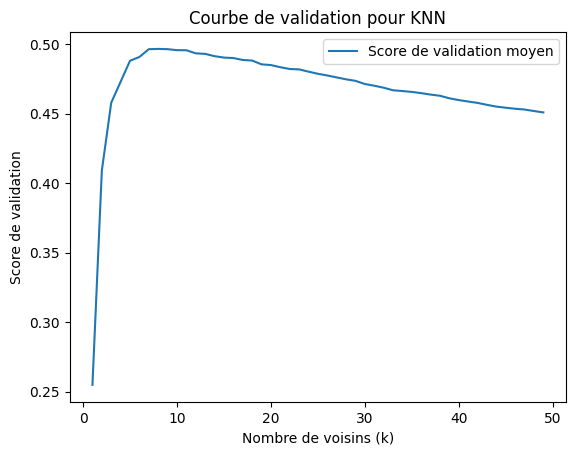

In [205]:
val_score_mean = val_score.mean(axis=1)

plt.plot(k, val_score.mean(axis=1))
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score de validation')
plt.title('Courbe de validation pour KNN')

# Ajout de la légende
plt.legend(['Score de validation moyen'])

plt.show()

In [225]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange (1,10),'metric': ['euclidean','manhattan']}
grid =GridSearchCV(KNeighborsRegressor(), param_grid, cv = 5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [226]:
grid.best_score_

0.5223901588050254

In [227]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 8}

In [228]:
model= grid.best_estimator_

In [229]:
model.score(X_test, y_test)

0.5490980302857931